# Reproduce: Bose, Phys. Rev. B 56, 4175 (1997)

In [1]:
%matplotlib inline

In [2]:
from numpy import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
from qutip import *

## Introduction

In Bose et al. PRA 56, 4175 (1997), the authors consider the preparation of nonclassical states in cavities with moving mirror. The nonclassical states are achived by letting the system evolve for a specific duration of time. Here we reproduce some of the results of Bose et al.using numberical simulations of the Schrodinger and master equations using QuTiP.

## Hamiltonian and initial state

The Hamiltonian of the cavity with a moving mirror is

$H = \hbar\omega_0 a^\dagger a + \hbar\omega_m b^\dagger b - \hbar g a^\dagger a (b + b^\dagger)$

where $\omega_0$ is the cavity frequency, $\omega_m$ is the frequency of the oscillation mode of the mirror and $g$ is the opto-mechanical coupling strength. The creation operators of the cavity mode and the mirror mode are $a$ and $b$, respectively.

The initial states of the cavity mode and the mirror mode are in the coherent states $|\alpha\rangle$ and $|\beta\rangle$, respectively.

## Undamped dynamics

In [6]:
# number of fock states in the cavity and mirror modes
N = 15
M = 30
r = 1.0

In [26]:
def solve_dynamics_undamped(r, k, alpha, beta, t, N, M):
    
    wm = 1
    w0 = r * wm
    g  = k * wm
    
    a = tensor(destroy(N), identity(M))
    b = tensor(identity(N), destroy(M))
    
    H = w0 * a.dag() * a + wm * b.dag() * b - g * a.dag() * a * (b + b.dag())
    
    psi0 = tensor(coherent(N, alpha), coherent(M, beta))
    
    options = {"nsteps": 15_000}
    result = mesolve(H, psi0, t, options=options)
    
    return result, expect(commutator(a, a.dag()), result.states), expect(commutator(b, b.dag()), result.states)
    #return result, expect(a.dag() * a, result.states), expect(b.dag() * b, result.states)

### Figure 1 in Bose et al.

In [27]:
t = linspace(0, 2 * pi, 50)

In [28]:
alpha = beta = 2

In [29]:
result, C1_A, C1_B = solve_dynamics_undamped(r, 0.1, alpha, beta, t, N, M)
S1 = [entropy_linear(ptrace(rho, 1)) for rho in result.states]

In [30]:
result, C2_A, C2_B = solve_dynamics_undamped(r, 0.5, alpha, beta, t, N, 2*M)
S2 = [entropy_linear(ptrace(rho, 1)) for rho in result.states]

In [31]:
result, C3_A, C3_B = solve_dynamics_undamped(r, 1.0, alpha, beta, t, N, 10*M)
S3 = [entropy_linear(ptrace(rho, 1)) for rho in result.states]

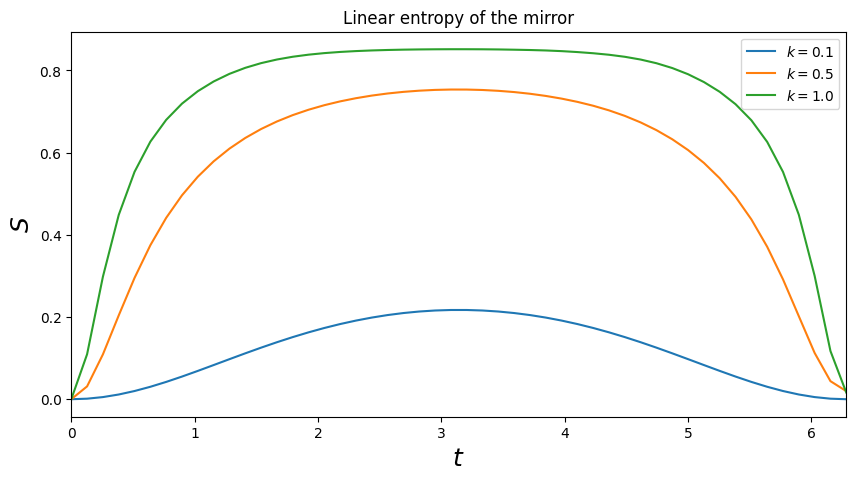

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, S1, label=r'$k = 0.1$')
ax.plot(t, S2, label=r'$k = 0.5$')
ax.plot(t, S3, label=r'$k = 1.0$')
ax.legend()
ax.set_title('Linear entropy of the mirror')
ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$S$', fontsize=18)
ax.set_xlim(0, t.max());

Since the dynamics here is undamped the quantum state is pure, and a nonzero entropy of a the subsystem of the mirror demonstrates that the mirror is entangled with the cavity field.

### Check Hilbert space truncation

As a check to make sure that we have use a sufficiently large Hilbert space in the calcuation above we plot the expectation value of the commutators $[a, a^\dagger]$ and $[b , b^\dagger]$ which should be very close to 1 if the Fock-state basis truncation that we used above is OK.

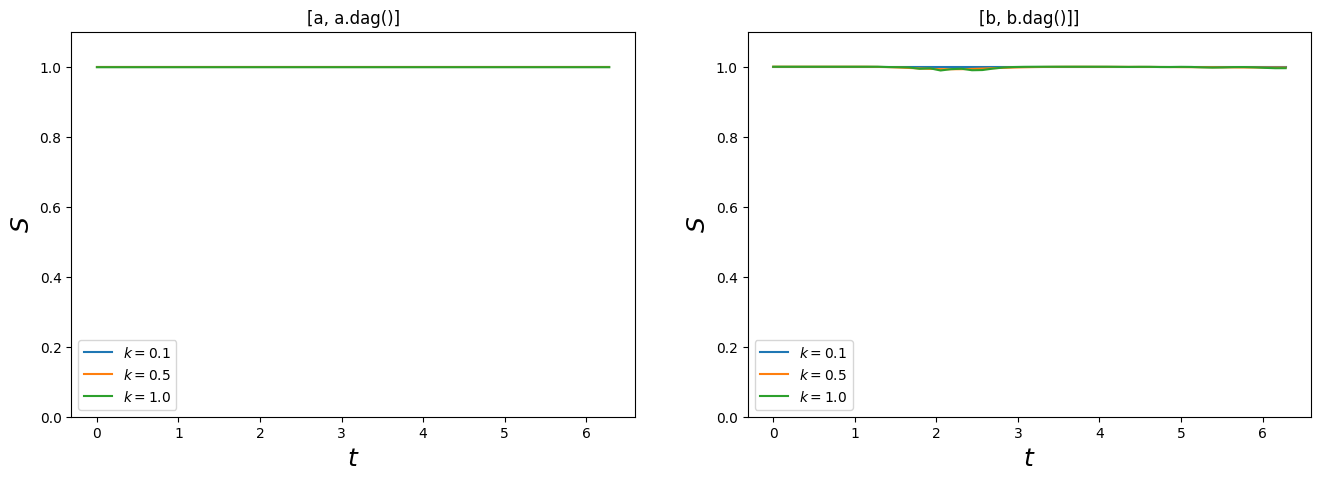

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].plot(t, C1_A, label=r'$k = 0.1$')
axes[0].plot(t, C2_A, label=r'$k = 0.5$')
axes[0].plot(t, C3_A, label=r'$k = 1.0$')
axes[0].legend()
axes[0].set_title('[a, a.dag()]')
axes[0].set_xlabel(r'$t$', fontsize=18)
axes[0].set_ylabel(r'$S$', fontsize=18);
axes[0].set_ylim(0, 1.1);

axes[1].plot(t, C1_B, label=r'$k = 0.1$')
axes[1].plot(t, C2_B, label=r'$k = 0.5$')
axes[1].plot(t, C3_B, label=r'$k = 1.0$')
axes[1].legend()
axes[1].set_title('[b, b.dag()]]')
axes[1].set_xlabel(r'$t$', fontsize=18)
axes[1].set_ylabel(r'$S$', fontsize=18)
axes[1].set_ylim(0, 1.1);

### Figure 2 in Bose et al.

The wigner function of the mirror for various times $t$.

In [34]:
t = [0, pi/2, pi, 3*pi/2, 2*pi]

In [35]:
result, C_A, C_B = solve_dynamics_undamped(r, 0.3, alpha, beta, t, N, M)

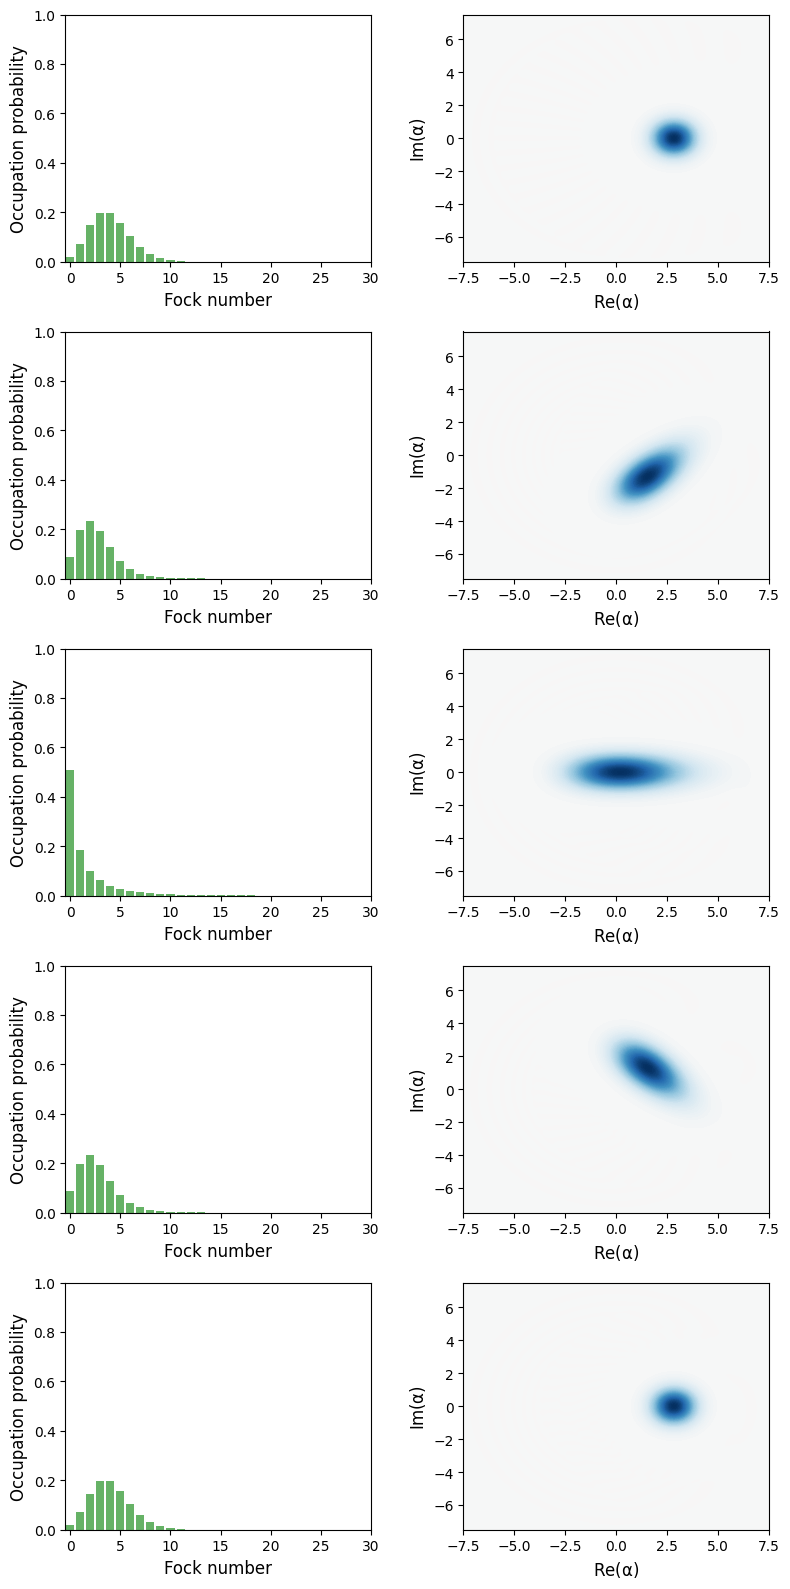

In [44]:
fig, axes = plt.subplots(len(t), 2, figsize=(8,16))

for idx, rho in enumerate(result.states):
    rho_mirror = ptrace(rho, 1)
    plot_fock_distribution(rho_mirror, fig=fig, ax=axes[idx, 0])
    plot_wigner(rho_mirror, fig=fig, ax=axes[idx, 1])
    
fig.tight_layout()

The mirror wigner functions are always positive and the mirror therefore always in a classical state.

### Figure 3 in Bose et al.

The wigner function of the cavity field at $t = 2\pi$, for three different values of $k$.

In [49]:
t = [0, 2*pi]

In [50]:
k_vec = [0.5, 0.4082, 0.3536]

In [51]:
states = [solve_dynamics_undamped(r, k, alpha, beta, t, 3*N, 3*M)[0].states[-1] for k in k_vec]

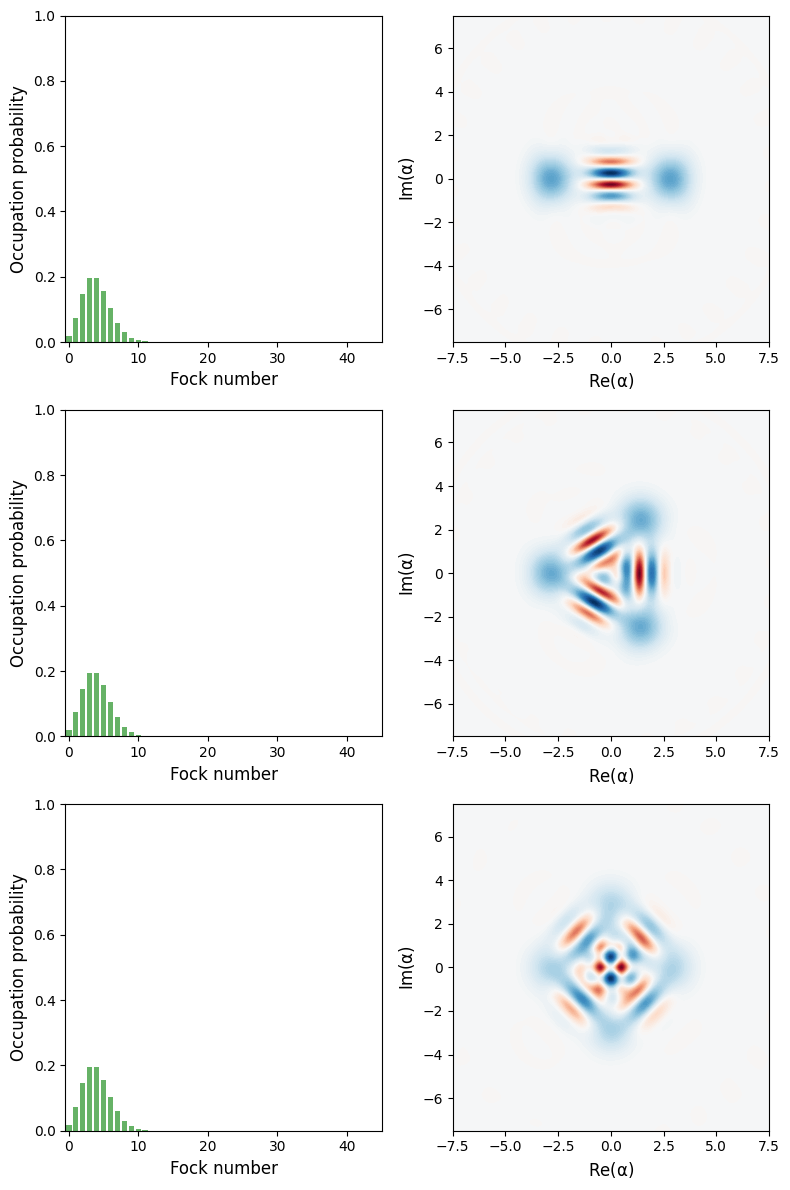

In [52]:
fig, axes = plt.subplots(len(k_vec), 2, figsize=(8,12))

for idx, rho in enumerate(states):
    rho_cavity = ptrace(rho, 0)
    plot_fock_distribution(rho_cavity, fig=fig, ax=axes[idx, 0])
    plot_wigner(rho_cavity, fig=fig, ax=axes[idx, 1])
    
fig.tight_layout()

For these particular parameters the cavity field is prepared in superpositions of two, three and four coherent states, respectively.

## Damped dynamics

In [77]:
# number of fock states in the cavity and mirror modes
N = 10
M = 10

In [78]:
def solve_dynamics_damped(r, k, gamma, alpha, beta, t, N, M):
    
    wm = 1
    w0 = r * wm
    g  = k * wm
    
    a = tensor(destroy(N), identity(M))
    b = tensor(identity(N), destroy(M))
    
    H = w0 * a.dag() * a + wm * b.dag() * b - g * a.dag() * a * (b + b.dag())

    psi0 = tensor(coherent(N, alpha), coherent(M, beta))
    
    c_ops = [sqrt(gamma) * b]
    
    options = {"nsteps": 15_000, "progress_bar": "enhanced"}
    return mesolve(H, psi0, t, c_ops, options=options)

### Figure 6 in Bose et al.

In [79]:
gamma = 1.0
alpha = 2
beta = 0

In [80]:
t = linspace(0, 2 * pi, 25)

In [81]:
S1 = [entropy_linear(ptrace(rho, 1)) for rho in solve_dynamics_damped(r, 0.1, gamma, alpha, beta, t, N, M).states]

 [**        8%           ] Elapsed 0.02s / Remaining 00:00:00:00

 Total run time:   0.18s*] Elapsed 0.18s / Remaining 00:00:00:00


In [82]:
S2 = [entropy_linear(ptrace(rho, 1)) for rho in solve_dynamics_damped(r, 0.5, gamma, alpha, beta, t, N, M).states]

 Total run time:   0.34s*] Elapsed 0.34s / Remaining 00:00:00:00


In [83]:
S3 = [entropy_linear(ptrace(rho, 1)) for rho in solve_dynamics_damped(r, 1.0, gamma, alpha, beta, t, N, M).states]

 Total run time:   0.69s*] Elapsed 0.69s / Remaining 00:00:00:00


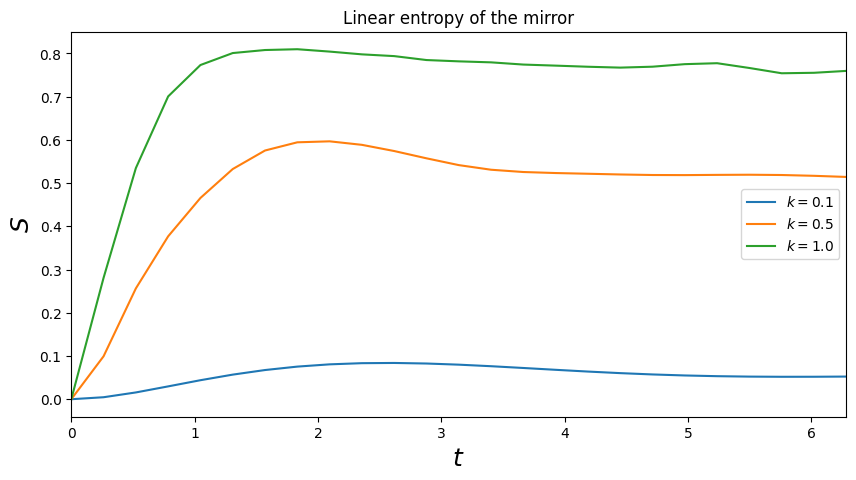

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, S1, label=r'$k = 0.1$')
ax.plot(t, S2, label=r'$k = 0.5$')
ax.plot(t, S3, label=r'$k = 1.0$')
ax.legend()
ax.set_title('Linear entropy of the mirror')
ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$S$', fontsize=18)
ax.set_xlim(0, t.max());

### Figure 7 in Bose et al.

In [85]:
t = [0, 2*pi]
k = 0.5
alpha = beta = 2

In [86]:
gamma_vec = [0.001, 0.01, 0.1, 1.0]

In [98]:
states = [solve_dynamics_damped(r, k, gamma, alpha, beta, t, 3*N, 2*M).states[-1] for gamma in gamma_vec]

 Total run time:  38.77s*] Elapsed 38.77s / Remaining 00:00:00:00
 Total run time:  45.80s*] Elapsed 45.80s / Remaining 00:00:00:00
 Total run time:  51.90s*] Elapsed 51.90s / Remaining 00:00:00:00
 Total run time:  53.20s*] Elapsed 53.20s / Remaining 00:00:00:00


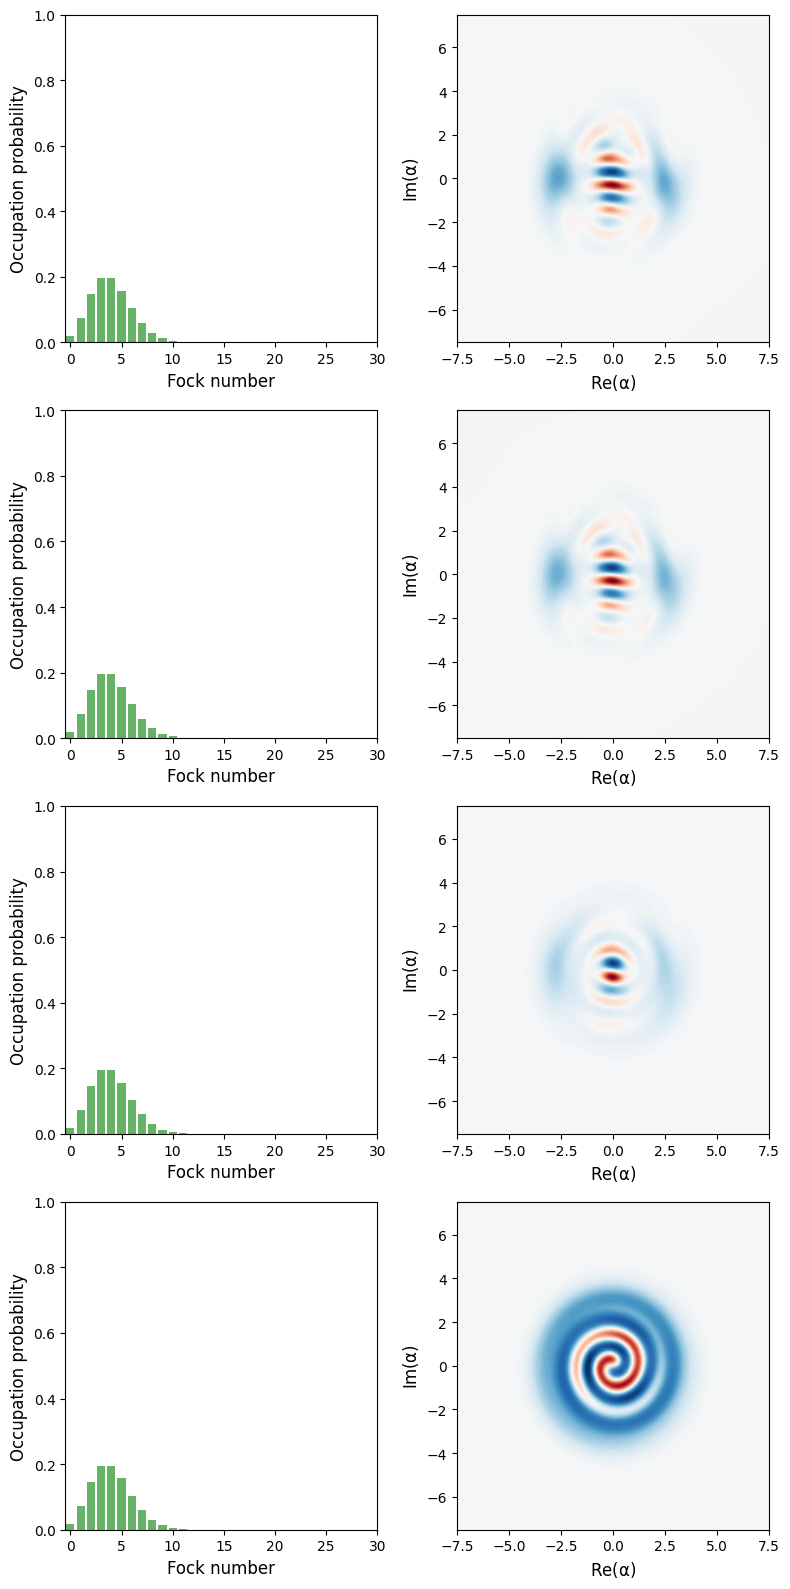

In [99]:
fig, axes = plt.subplots(len(gamma_vec), 2, figsize=(8,16))

for idx, rho in enumerate(states):
    rho_cavity = ptrace(rho, 0)
    plot_fock_distribution(rho_cavity, fig=fig, ax=axes[idx, 0])
    plot_wigner(rho_cavity, fig=fig, ax=axes[idx, 1])
    
fig.tight_layout()

## Versions

In [5]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, qutip

Software versions
Python 3.13.5 64bit [GCC 15.1.1 20250521 (Red Hat 15.1.1-2)]
IPython 9.2.0
OS Linux 6.14.11 300.fc42.x86_64 x86_64 with glibc2.41
numpy 2.3.1
scipy 1.16.0
matplotlib 3.10.3
qutip 5.2.0
Mon Jul 14 09:01:53 2025 CEST